In [1]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [33]:
# パラメータ設定
T = 11.76e-6
f = 1 / T
w = f * 2 * np.pi
L1 = 246e-6
L2 = 106e-6
C1 = 1 / (w**2 * L1)
C2 = 1 / (w**2 * L2)
M = 20.6e-6
RL = 5.7
V1dc = 30

beta1 = 1/2/L1
beta0 = RL/4/L1/L2
alpha1 = RL/2/L2
alpha0 = (w*M)**2/4/L1/L2



85034.01360544219


In [4]:
def get_data(filename: str) -> pd.DataFrame:
    data = pd.read_csv(filename, sep=",", skiprows=20)
    return data

(-40.0, 40.0)

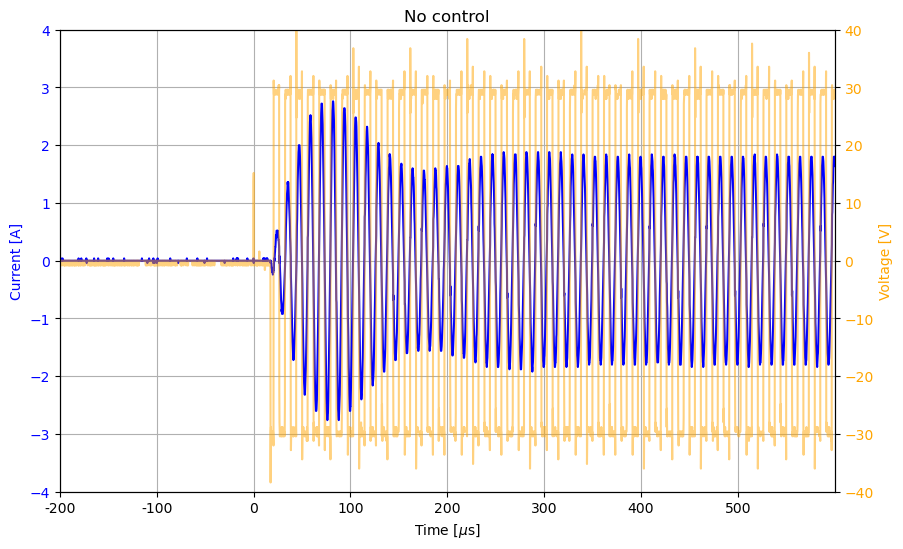

In [32]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
df = get_data("tek0000ALL.csv")
ax1.plot(df["TIME"], df["CH1"], label="CH1", c="blue", zorder=5)
ax1.set_xlabel("Time [$\mu$s]")
ax1.set_xticks(np.arange(-0.2e-3, 0.6e-3, 0.1e-3), labels=np.arange(-200, 600, 100))
ax1.set_ylabel("Current [A]", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xlim(-0.2e-3, 0.6e-3)
ax1.set_ylim(-4, 4)
ax1.set_title("No control")
ax1.grid()
ax2 = ax1.twinx()
ax2.set_ylabel("Voltage [V]", c="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.plot(df["TIME"], df["CH2"], color="orange", label="CH2", alpha=0.5)
ax2.set_ylim(-40, 40)